# Introduction 📝

**Objective:** Train a model to predict the price of homes for sale from the 'Houses_in_london' dataset. The model should be able to price houses that are not in the dataset, providing an estimated value for sellers and buyers.

**Dataset Columns:**<br>

**Address:** Address of the house<br>
**Neighborhood:** Neighborhood of the house<br>
**Bedrooms:** Number of bedrooms<br>
**Bathrooms:** Number of bathrooms<br>
**Square Meters:** Square meters<br>
**Building Age:** Age of the building<br> 
**Garden:** Garden (Yes/No)<br>
**Garage:** Garage (Yes/No)<br>
**Floors:** Number of floors<br>
**Property Type:** Property type (House / Apartment / Semi-Detached)<br>
**Heating Type:** Type of heating<br>
**Balcony:** Type of balcony<br>
**Interior Style:** Interior style (Industrial / Classic / Modern)<br>
**View:** View from the house<br>
**Materials:** Construction material<br>
**Building Status:** Building condition<br>
**Price:** Property price<br>

**Questions:**<br>

❓What characteristics most influence the price of homes?<br>
❓Which neighborhood has the most expensive homes?<br>
❓Is it possible to predict the value of homes?

# Pre-Processing 🧪

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
df = pd.read_csv(r"C:\Users\Leona\OneDrive\Documentos\Data_Projects\London_houses\london_houses.csv")

In [5]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


**Essential Questions**

1. Are there variables with missing values?
2. The data types are correctly?
3. Are there duplicate values?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [7]:
# Verifying duplicated values
df.duplicated().any()

False

In [8]:
df = df.rename(columns={'Price (£)': 'Price'})

In [9]:
# Function to remove houses number
def remove_house_number(address):
    return re.sub(r'^\d+\s+', '', address)

In [10]:
# Removing houses number
df['Address'] = df['Address'].apply(remove_house_number)

In [11]:
# Price por Square Meters
df['Price per SM'] = df['Price'] / df['Square Meters']

In [12]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price,Price per SM
0,Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200,12800.00
1,Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000,12000.00
2,Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600,11200.00
3,Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000,8000.00
4,Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000,12000.00


# Exploratory Analysis 🔎

In [13]:
# Houses for Neighborhood number 
df['Neighborhood'].value_counts().sort_values(ascending=False)

Neighborhood
Kensington      114
Marylebone      113
Camden          106
Westminster      98
Islington        97
Greenwich        97
Notting Hill     96
Soho             96
Chelsea          94
Shoreditch       89
Name: count, dtype: int64

## Identifyng Outliers

In [14]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

IQR = q3 - q1

price_outliers = df[(df['Price'] < ( q1 - IQR * 1.5)) | (df['Price'] > (q3 + IQR * 1.5))]
price_inliers = df[(df['Price'] >= ( q1 - IQR * 1.5)) & (df['Price'] <= (q3 + IQR * 1.5))]

In [15]:
price_outliers.shape[0]

10

**WARNING ⚠️<br>**
All the following analyses are performed without the outlier data, which means the analysis does not consider all the data from the original dataset.

**Ten outliers were identified; let's remove them and determine the average house price.**

In [16]:
df = df.drop(index=price_outliers.index)

In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns

**We can notice that, although the Chelsea neighborhood has the highest average house price, its houses have the lowest average square meters.**

In [18]:
# Average of numerical variables per neighborhood
df.groupby(['Neighborhood'])[numeric_cols].mean().sort_values(by='Price', ascending=False)

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price,Price per SM
Neighborhood,,,,,,,
Chelsea,2.84,1.89,145.00,52.26,2.16,2382549.36,16615.38
Kensington,3.19,1.93,147.45,48.16,1.94,2245121.01,15222.62
Westminster,2.89,2.04,145.54,52.75,2.01,2178116.13,14877.42
Notting Hill,2.86,2.07,146.18,51.54,2.07,1957588.57,13444.44
Marylebone,3.12,1.96,146.28,52.22,1.90,1824982.30,12575.22
Soho,3.05,2.02,153.51,46.59,1.93,1781120.77,11608.33
Camden,3.19,1.95,150.71,47.91,1.96,1626332.17,10767.92
Islington,2.95,2.03,150.99,53.97,1.94,1507373.20,10045.36
Shoreditch,3.17,2.06,149.76,50.04,2.02,1332828.89,8940.07


**Average Price per Square Meter by Neighborhood**
According to the provided data, the top 3 most expensive neighborhoods to live in London are:

- Chelsea, average price per square meter: €16,615.38<br>
- Kensington, average price per square meter: €15,222.62<br>
- Westminster, average price per square meter: €14,877.42<br>

And the top 3 most affordable neighborhoods to live in London are:<br>
- Greenwich, average price per square meter: €8,295.53<br>
- Shoreditch, average price per square meter: €8,940.07<br>
- Islington, average price per square meter: €10,045.36<br>

In [19]:
# Analyzing price mean without the influence of outliers
df.groupby(['Neighborhood'])['Price'].mean().sort_values(ascending=False)

Neighborhood
Chelsea        2382549.36
Kensington     2245121.01
Westminster    2178116.13
Notting Hill   1957588.57
Marylebone     1824982.30
Soho           1781120.77
Camden         1626332.17
Islington      1507373.20
Shoreditch     1332828.89
Greenwich      1269408.81
Name: Price, dtype: float64

## Relation between numeric variables

Analyzing the correlation between variables, only 'Price' and 'Square Meters' show a strong positive correlation. This indicates that 'Square Meters' might be a good parameter for determining house prices.

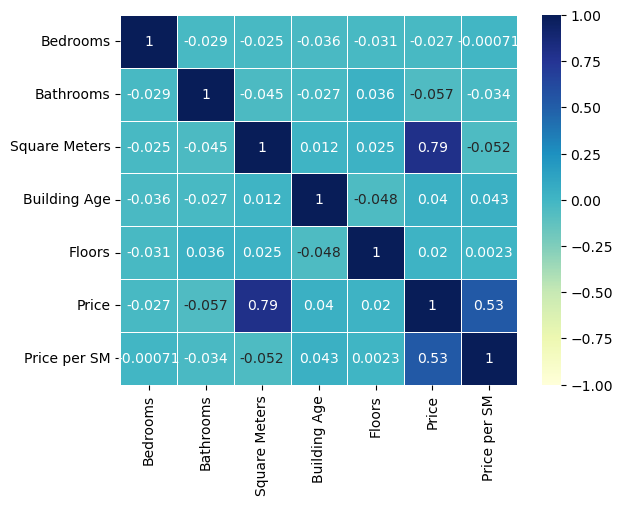

In [20]:
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, vmin=-1, vmax=1)
plt.show()

There seems to be a linear relationship between 'Square Meters' and 'Price' when separated by neighborhood. Let's analyze them by neighborhood to better examine the relationship between these variables.

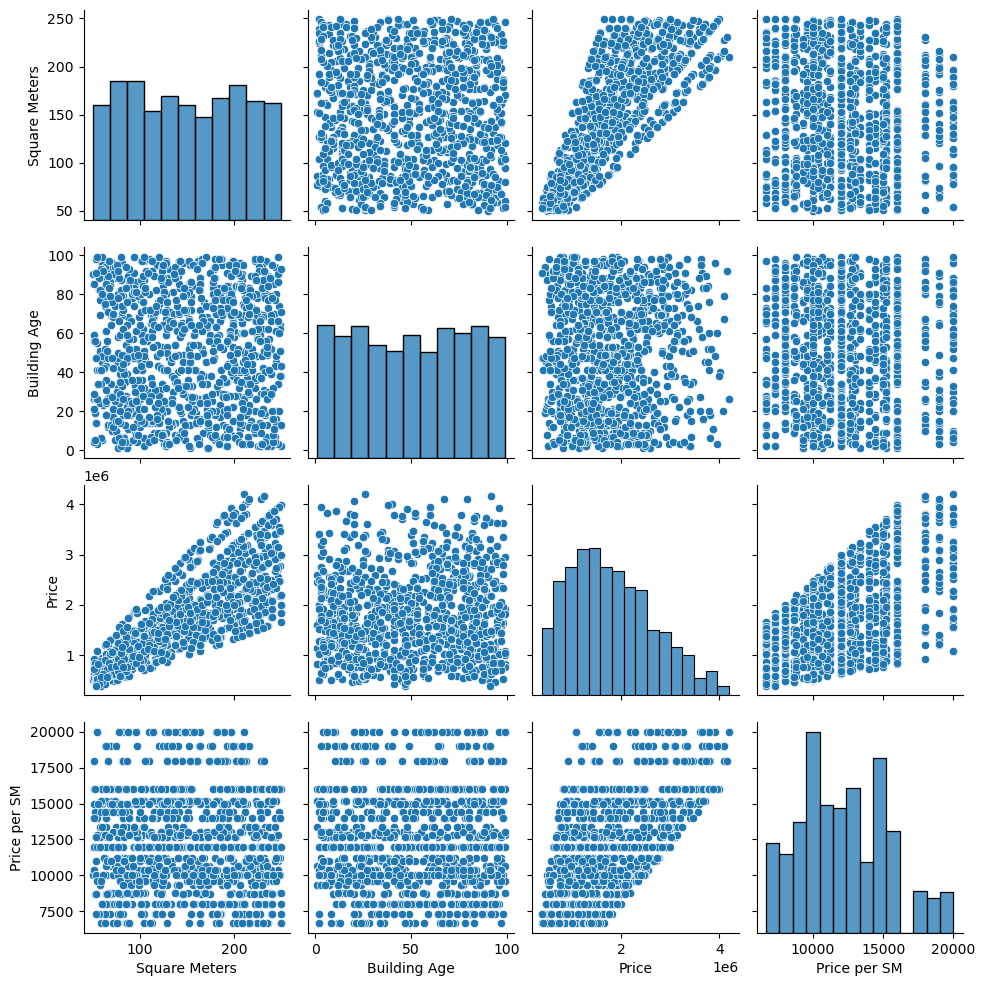

In [21]:
sns.pairplot(data=df.drop(columns=['Bedrooms', 'Bathrooms', 'Floors']))

<Axes: xlabel='Square Meters', ylabel='Price'>

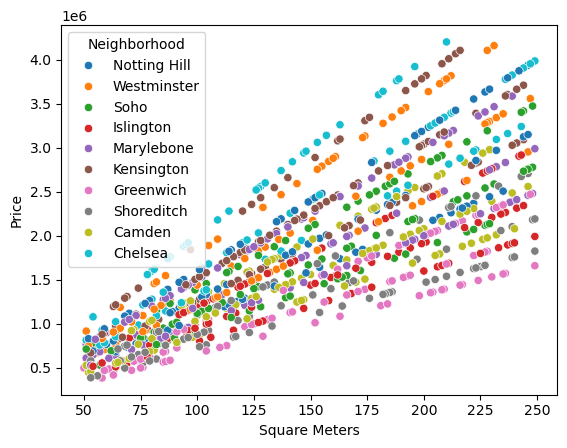

In [22]:
x = df['Square Meters']
y = df['Price']

sns.scatterplot(data=df, x=x, y=y, hue='Neighborhood')

**Scatter plot by neighborhood:**

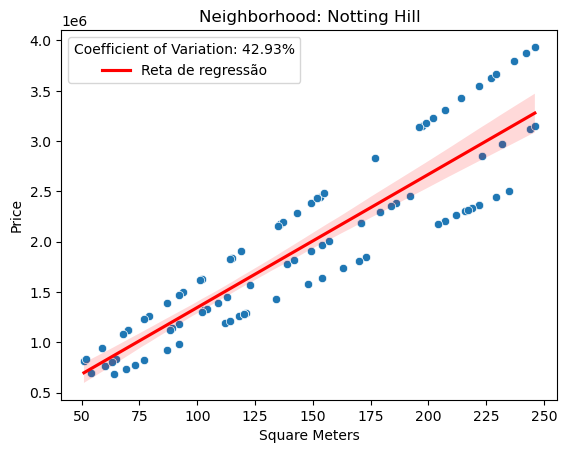

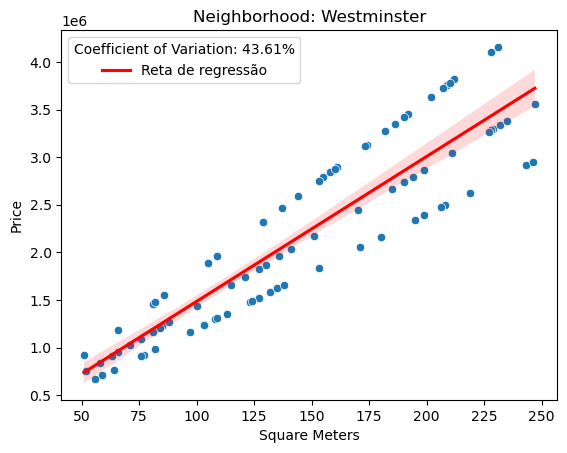

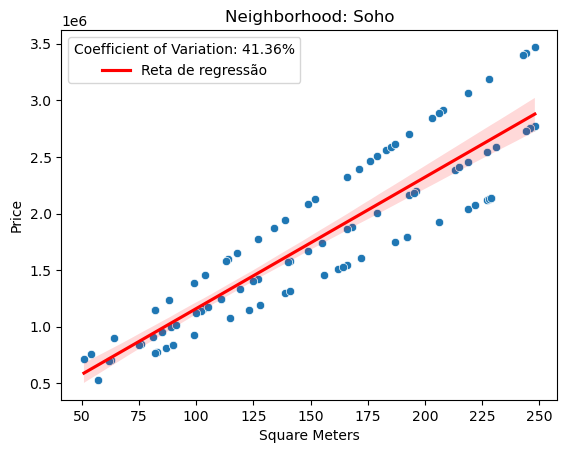

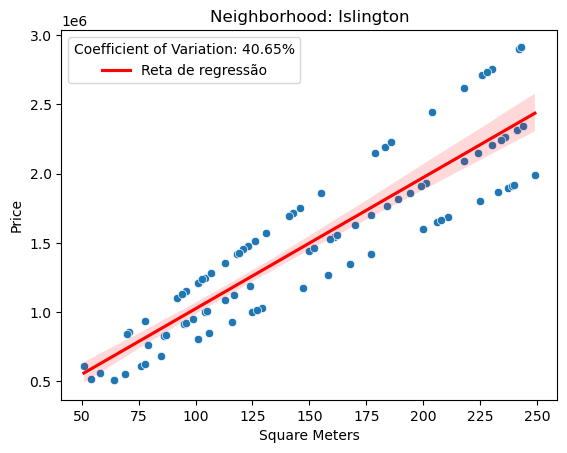

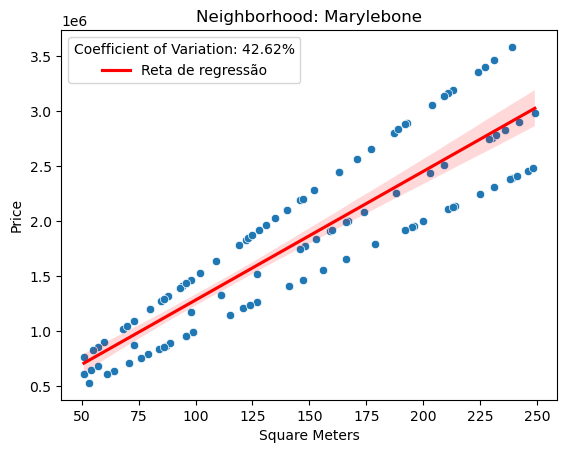

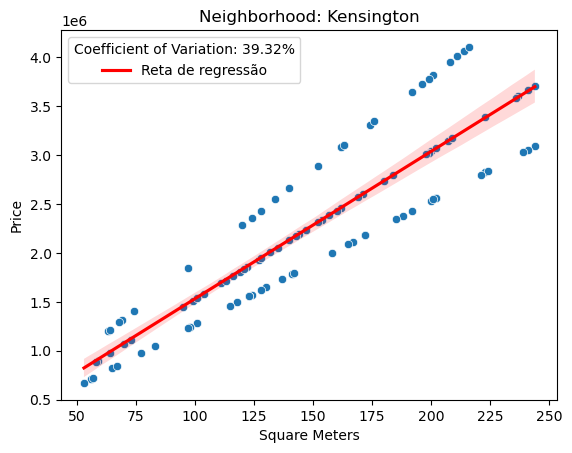

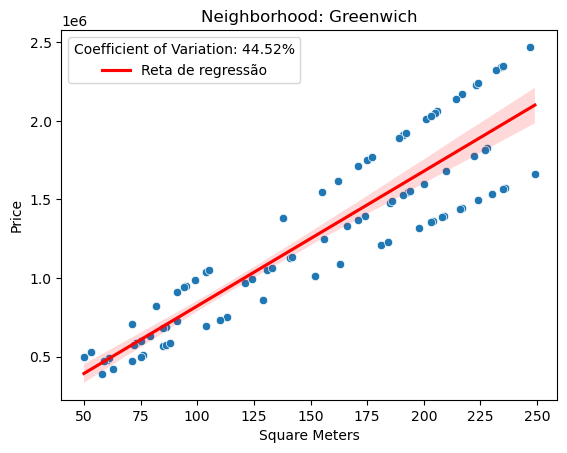

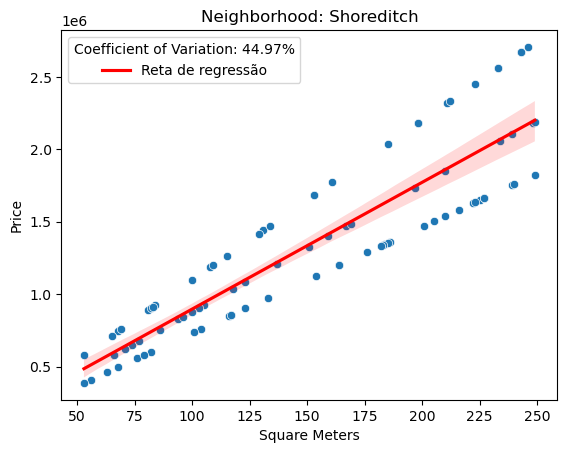

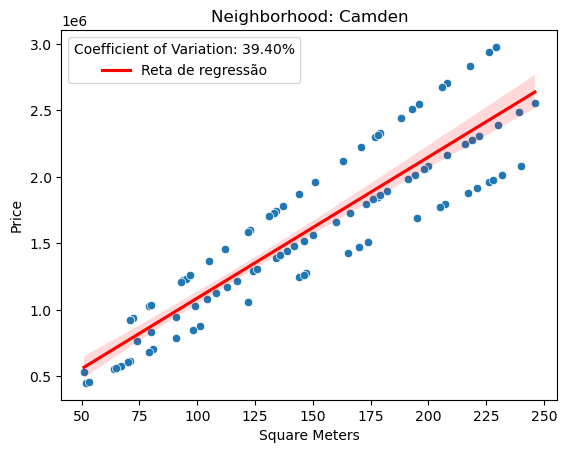

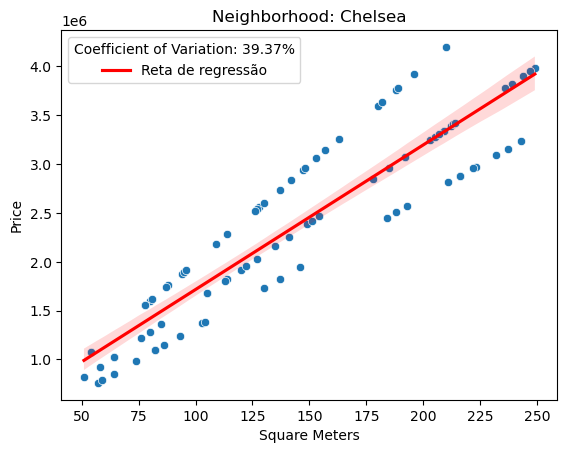

In [25]:
def neighborhood_metrics(neighborhood):
    df_neighborhood = df[df['Neighborhood'] == neighborhood]
    return df_neighborhood

cv_list = {}

for neighborhood in df['Neighborhood'].unique():
    df_neighborhood = neighborhood_metrics(neighborhood)
    standard_deviation = df_neighborhood['Price'].std()
    mean = df_neighborhood['Price'].mean()
    
    coefficient_of_variation = (standard_deviation/mean) * 100 if mean != 0 else 0
    cv_list[neighborhood] = coefficient_of_variation
    
    sns.scatterplot(data=df_neighborhood, x=df_neighborhood['Square Meters'], y=df_neighborhood['Price'])

    # Straight linear regression
    sns.regplot(data=df_neighborhood, x=df_neighborhood['Square Meters'], y=df_neighborhood['Price'], scatter=False, label='Reta de regressão',  color='Red')

    plt.legend(
        title=f'Coefficient of Variation: {coefficient_of_variation:.2f}%',
        loc='upper left'
    )
    plt.title(f'Neighborhood: {neighborhood}')
    plt.show()

Despite having slightly dispersed values, the graph presents a linear relationship for each of the values ​​per neighborhood

## Relation between categorical variables

In [26]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price,Price per SM
0,Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200,12800.00
1,Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000,12000.00
2,Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600,11200.00
3,Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000,8000.00
4,Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000,12000.00


**Type of Property by Neighborhood:**

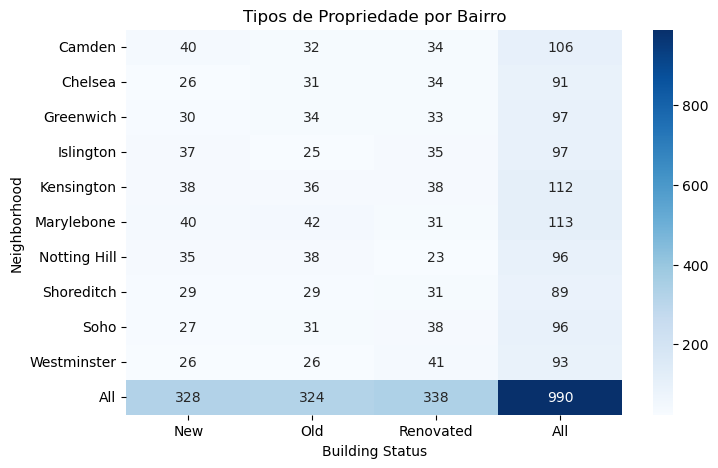

In [27]:
contingency_table = pd.crosstab(df['Neighborhood'], df['Building Status'], margins=True)

plt.figure(figsize=(8,5))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Tipos de Propriedade por Bairro')
plt.show()

## Relation between categorical and numeric variables

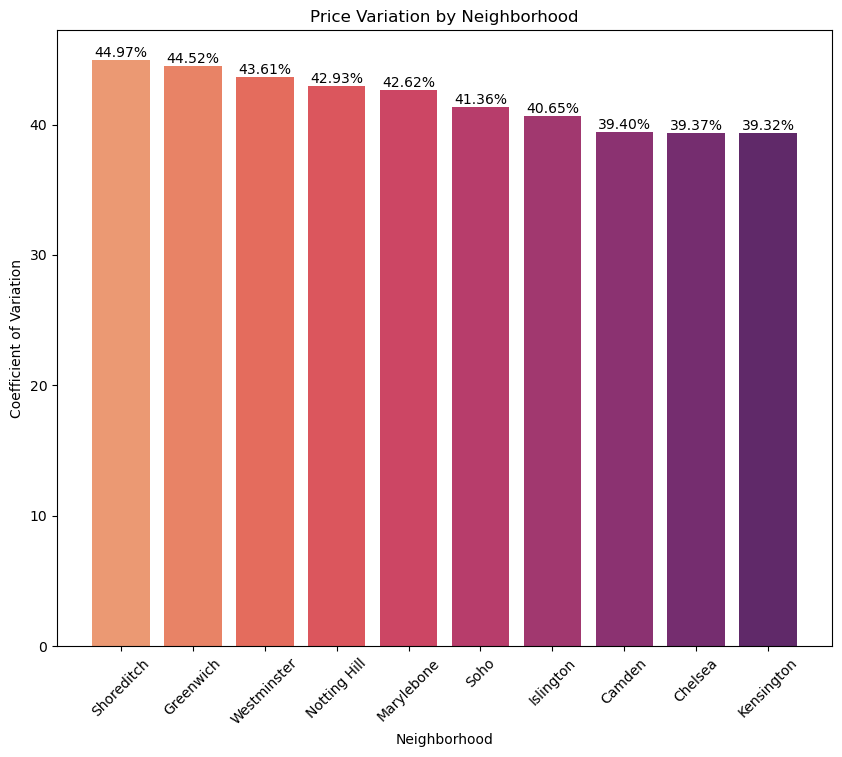

In [28]:
# Sorted Coefficient of Variation
cv_sorted = sorted(cv_list.items(), key=lambda item: item[1], reverse=True)

# Creates a dataframe object for cv
cv_dataframe = pd.DataFrame(cv_sorted)

# Renames the columns of cv
cv_dataframe = cv_dataframe.rename(columns={0: 'Neighborhood', 1: 'CV'})

X = cv_dataframe['Neighborhood']
Y = cv_dataframe['CV']

plt.figure(figsize=(10,8))

colors = sns.color_palette('flare', len(X))

bars = plt.bar(X, Y, color=colors)

plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Coefficient of Variation')
plt.title('Price Variation by Neighborhood')

for bar in bars:
    # Gets the coordinates of the bar on the Y-axis
    yval = bar.get_height()
    # bar.get_x() returns the position where the bar starts and bar.get_width() returns the width of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()

The price of homes in the Shoreditch neighborhood has a higher price variation. Homes vary by 44.97% from the average, indicating that buyers will face more uncertainty regarding the home prices. The infrastructure of homes in this neighborhood may have more relevance in their purchase value.

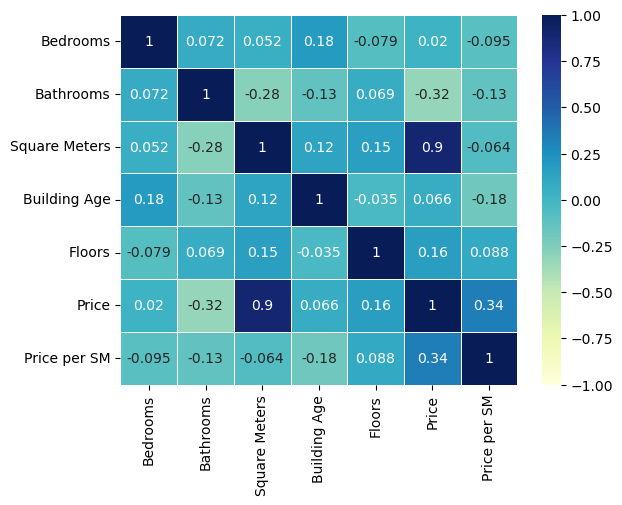

In [29]:
df_schoreditch = df[df['Neighborhood'] == 'Shoreditch']

correlation_matrix = df_schoreditch[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, vmin=-1, vmax=1)
plt.show()

<Axes: xlabel='Square Meters', ylabel='Count'>

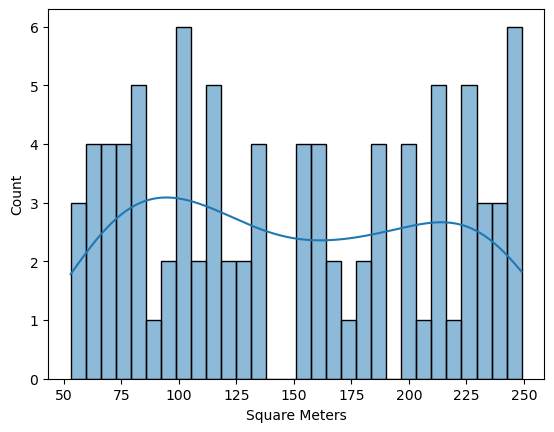

In [30]:
sns.histplot(data=df_schoreditch, bins=30,  x=df_schoreditch['Square Meters'], kde=True)

The **"Square Meters"** of homes vary significantly, which explains the variation coefficient in home prices, as "Square Meters" and "Price" have a very high correlation of 0.9 in the Shoreditch neighborhood.

In [31]:
# Categorical data
categoric_cols = df.select_dtypes(include='object').columns.to_list()

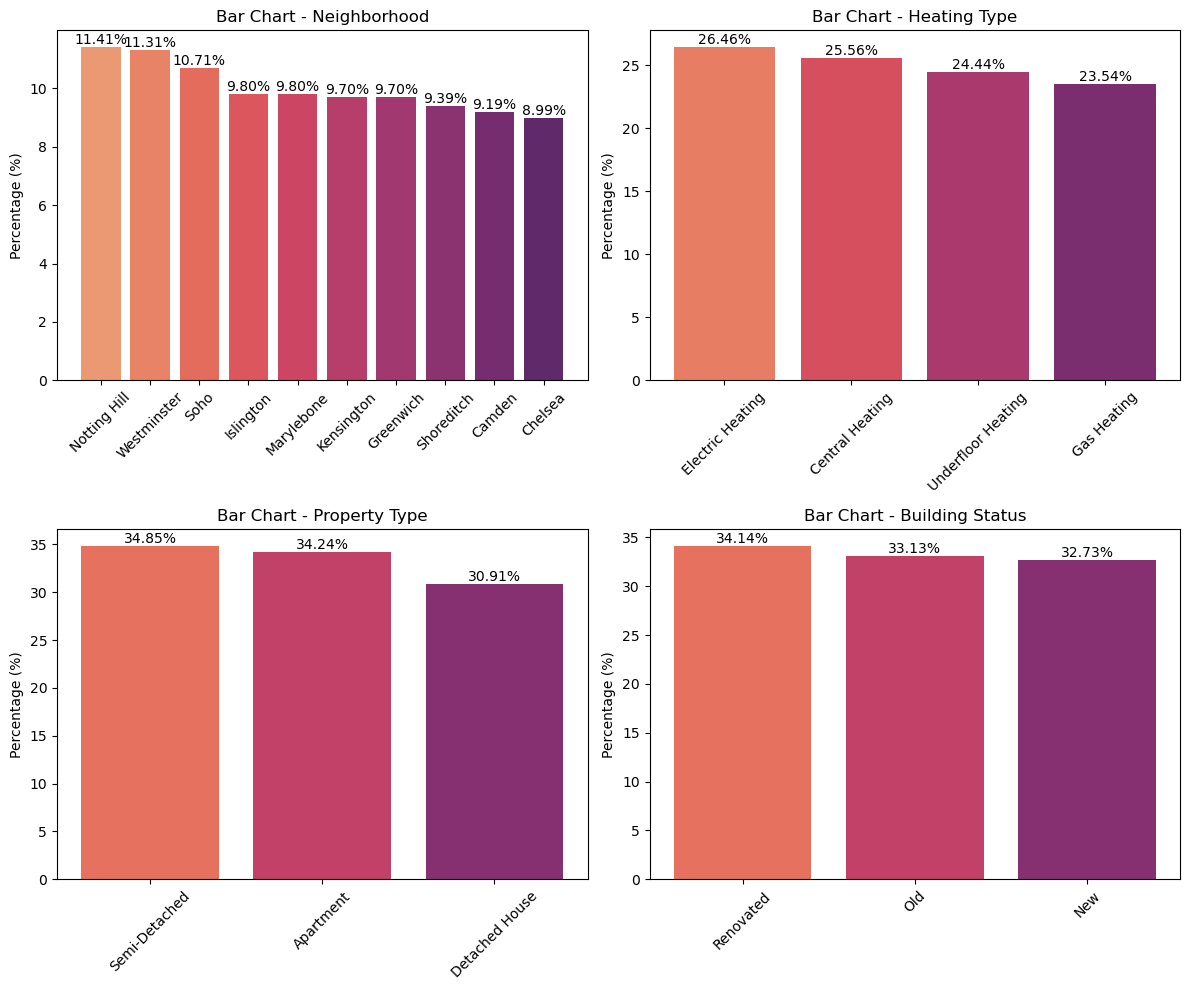

In [32]:
cols = df[['Neighborhood', 'Heating Type', 'Property Type', 'Building Status']]

fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

for i, column in enumerate(cols):
    x = df[column].unique()
    y = df[column].value_counts()
    percentages = (y / y.sum()) * 100
    colors = sns.color_palette('flare', len(x))

    axes[i].tick_params(axis='x', rotation=45)
    bars = axes[i].bar(x, percentages, color=colors)
    axes[i].set_title(f'Bar Chart - {column}')
    axes[i].set_ylabel(f'Percentage (%)')

    for bar in bars:
        # Gets the coordinates of the bar on the Y-axis
        yval = bar.get_height()
        # bar.get_x() returns the position where the bar starts, and bar.get_width() returns the width of the bar
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')


plt.tight_layout()
plt.show()


## Distribution

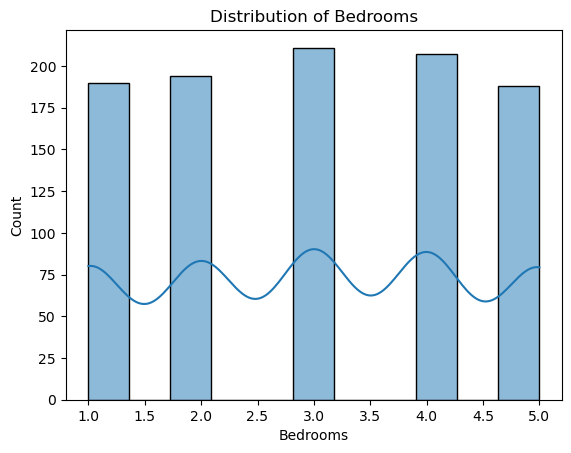

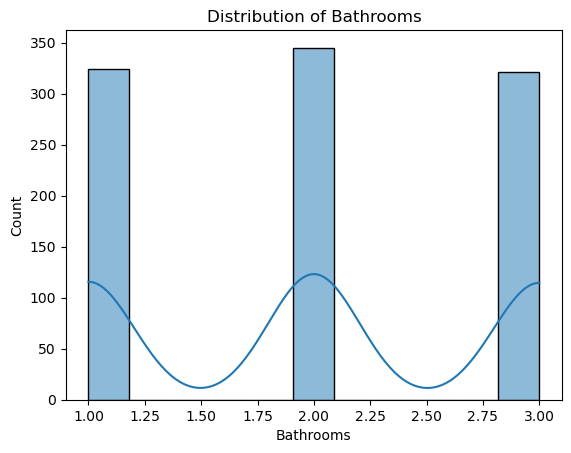

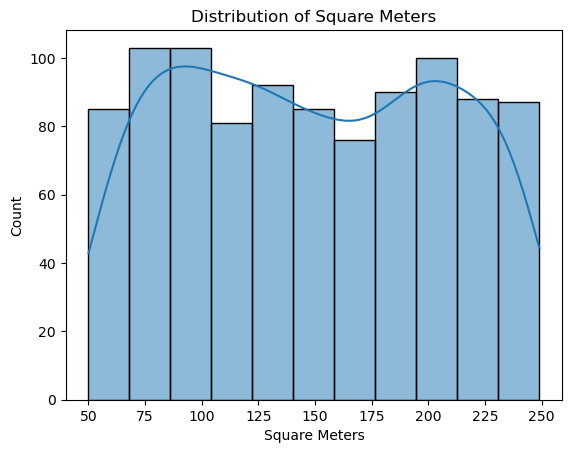

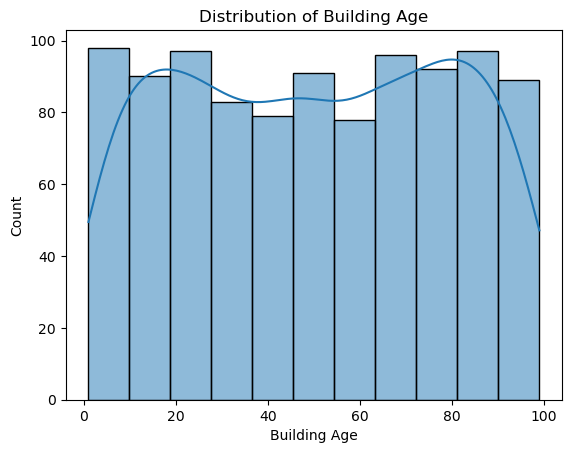

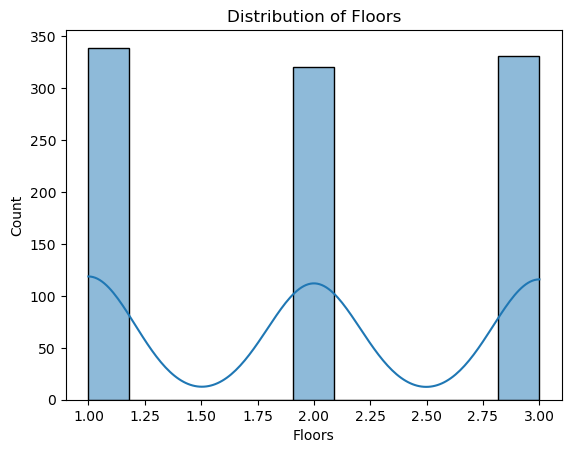

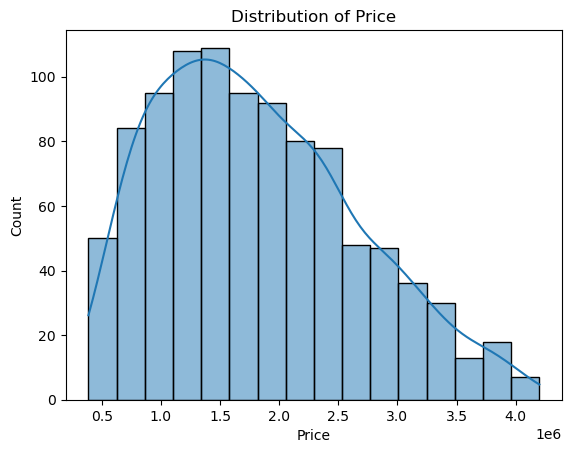

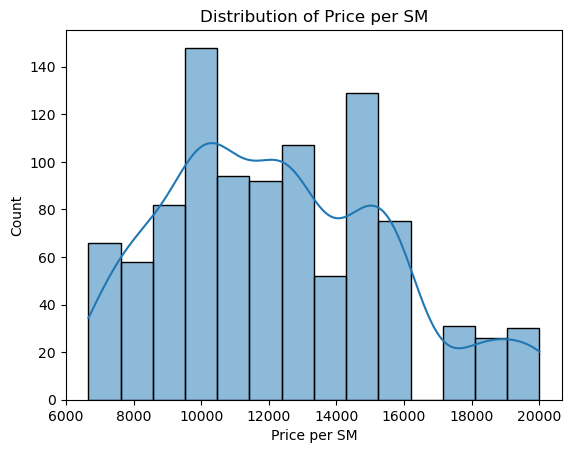

In [33]:
for col in df.drop(columns=categoric_cols):
    sns.histplot(data=df, x=col, kde=True).set_title(f'Distribution of {col}')
    plt.show()

**Distribution of price by neighborhood**

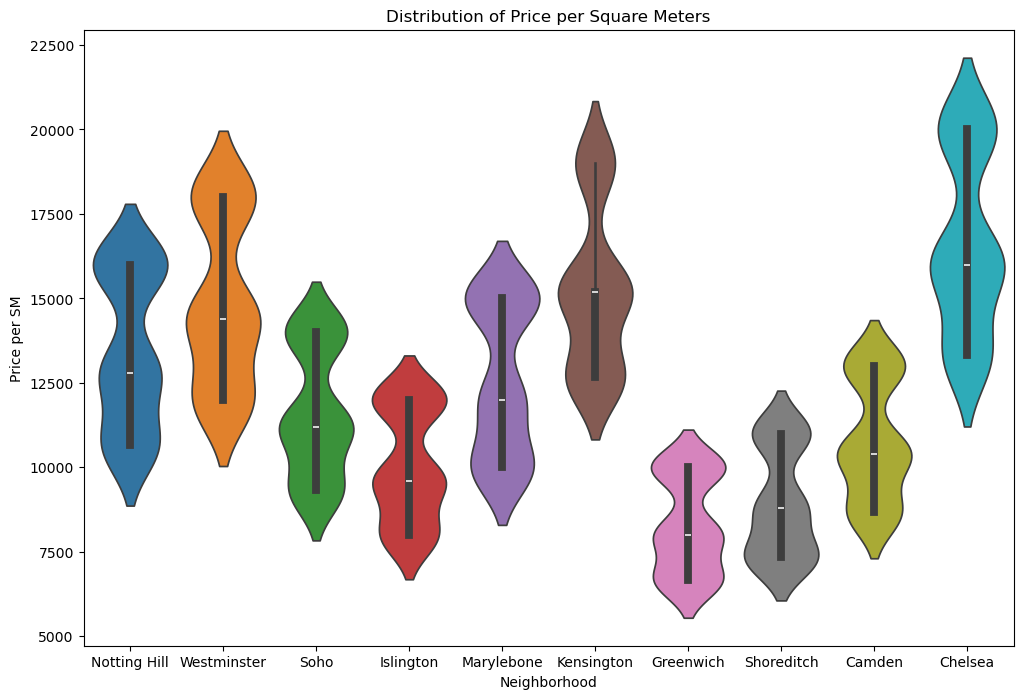

In [34]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x='Neighborhood' , y='Price per SM', hue='Neighborhood').set_title(f'Distribution of Price per Square Meters')
plt.show()

In [35]:
df['View'].unique()

array(['Garden', 'City', 'Street', 'Park', 'Sea'], dtype=object)

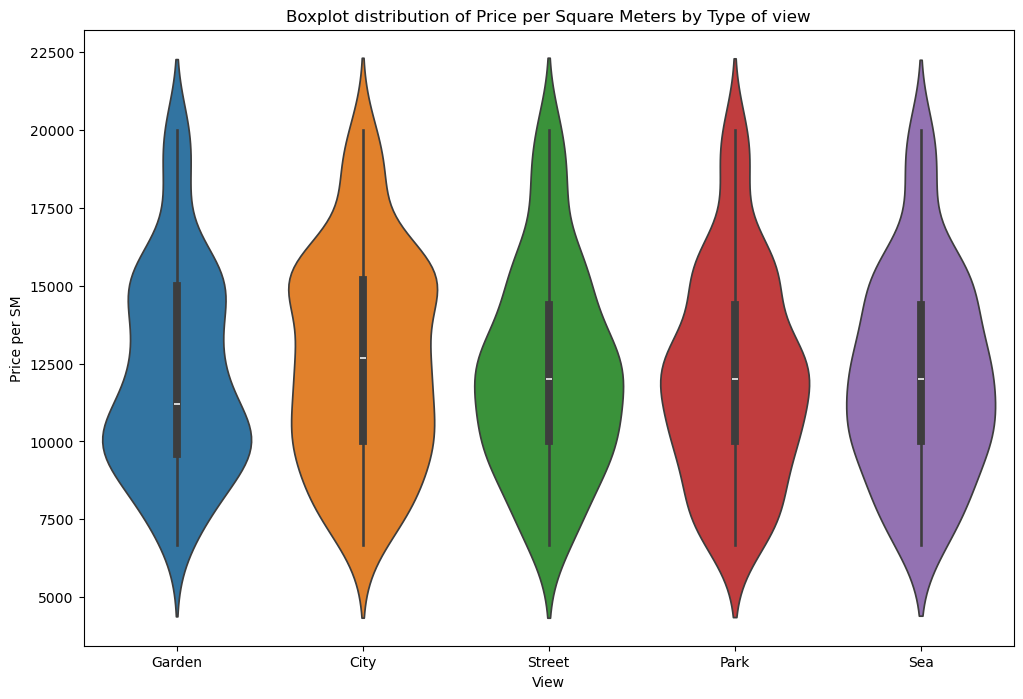

In [36]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x='View', y='Price per SM', hue='View').set_title('Boxplot distribution of Price per Square Meters by Type of view')
plt.show()

## Price per Square Meters

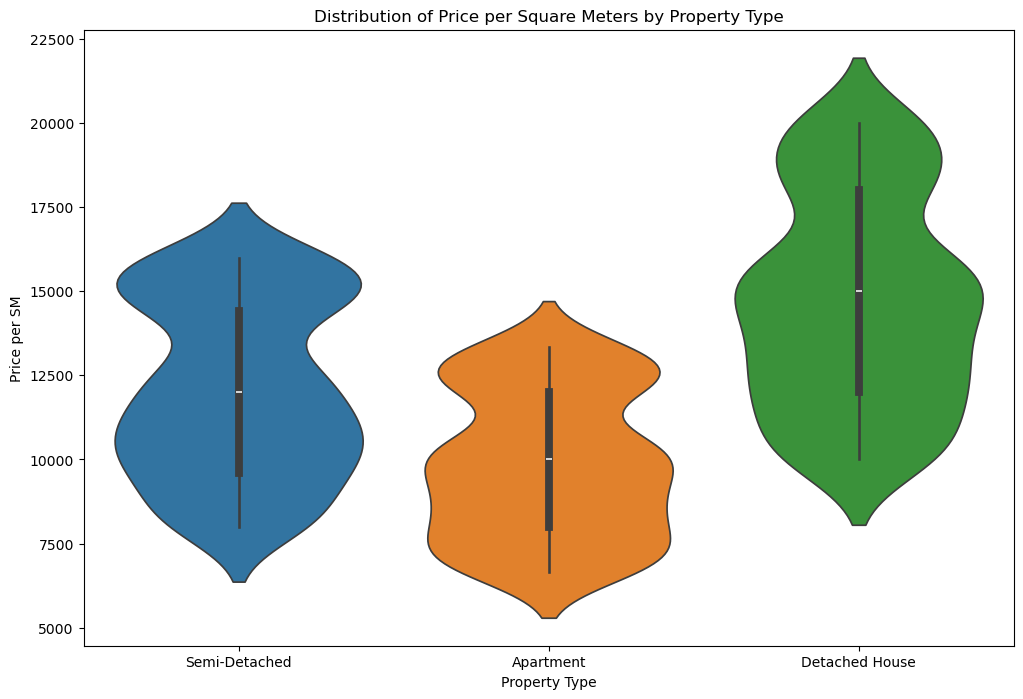

In [37]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x='Property Type', y='Price per SM', hue='Property Type').set_title('Distribution of Price per Square Meters by Property Type')
plt.show()

# Transforming categorical data 🔃

In [38]:
categoric_cols

['Address',
 'Neighborhood',
 'Garden',
 'Garage',
 'Property Type',
 'Heating Type',
 'Balcony',
 'Interior Style',
 'View',
 'Materials',
 'Building Status']

In [39]:
df_categoric = df[categoric_cols].copy()

In [40]:
df_categoric

,Address,Neighborhood,Garden,Garage,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status
0,Regent Street,Notting Hill,No,No,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated
1,Oxford Street,Westminster,Yes,No,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old
2,Regent Street,Soho,No,Yes,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated
3,Piccadilly Circus,Islington,Yes,Yes,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated
4,Fleet Street,Marylebone,No,Yes,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old
...,...,...,...,...,...,...,...,...,...,...,...
995,Camden High Street,Westminster,Yes,Yes,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated
996,Park Lane,Camden,No,No,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old
997,Camden High Street,Camden,No,Yes,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old
998,Park Lane,Camden,Yes,No,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated


We want to transform the categorical data into numeric data before performing the analysis. For this, we need to remove the house numbers and keep only the street numbers.

In [41]:
df_categoric.columns

Index(['Address', 'Neighborhood', 'Garden', 'Garage', 'Property Type',
       'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials',
       'Building Status'],
      dtype='object')

## Converting categorical data to numeric data

In [42]:
# Categorical DataFrame
df_categoric['Building Status'].value_counts()

Building Status
Renovated    338
New          328
Old          324
Name: count, dtype: int64

In [43]:
# Dataframe with ordinal values
df_ordinal = df_categoric[['Building Status', 'Interior Style', 'Balcony']].copy()

In [44]:
for col in df_ordinal:
    print(df_ordinal[col].unique())

['Renovated' 'Old' 'New']
['Industrial' 'Classic' 'Modern' 'Minimalist']
['High-level Balcony' 'No Balcony' 'Low-level Balcony']


**Converting the values of the 'Build Status', 'Interior Style', and 'Balcony' variables to ordinal.**

Building Status: Old = 0 | Renovated = 1 | New = 2
Interior Style: Classic = 0 | Industrial = 1 | Modern = 2 | Minimalist = 3
Balcony: No Balcony = 0 | Low-level Balcony = 1 | High-level Balcony = 2

In [45]:
df_ordinal['Building Status'] = df_ordinal['Building Status'].map({'Old': 0, 'Renovated': 1, 'New': 1})
df_ordinal['Interior Style'] = df_ordinal['Interior Style'].map({'Classic': 0, 'Industrial': 1, 'Modern': 2, 'Minimalist': 3})
df_ordinal['Balcony'] = df_ordinal['Balcony'].map({'No Balcony': 0, 'Low-level Balcony': 1, 'High-level Balcony': 2})

In [46]:
df_ordinal

,Building Status,Interior Style,Balcony
0,1,1,2
1,0,1,2
2,1,1,0
3,1,0,0
4,0,2,0
...,...,...,...
995,1,2,1
996,0,1,0
997,0,3,1
998,1,2,2


In [47]:
# Dataframe with nominal values.
df_nominals = df_categoric.drop(columns=df_ordinal.columns)

In [48]:
df_nominals.columns

Index(['Address', 'Neighborhood', 'Garden', 'Garage', 'Property Type',
       'Heating Type', 'View', 'Materials'],
      dtype='object')

**Creating a new dataframe to analysis:**

In [49]:
df_analysis = df.copy()

In [50]:
# Replace ordinal columns.
df_analysis[df_ordinal.columns] = df_ordinal 

In [51]:
df_analysis = pd.get_dummies(df_analysis, columns=df_nominals.columns) 

In [52]:
df_analysis.columns

Index(['Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Floors',
       'Balcony', 'Interior Style', 'Building Status', 'Price', 'Price per SM',
       'Address_Baker Street', 'Address_Bond Street',
       'Address_Camden High Street', 'Address_Fleet Street',
       'Address_King's Road', 'Address_Oxford Street', 'Address_Park Lane',
       'Address_Piccadilly Circus', 'Address_Regent Street', 'Address_Strand',
       'Neighborhood_Camden', 'Neighborhood_Chelsea', 'Neighborhood_Greenwich',
       'Neighborhood_Islington', 'Neighborhood_Kensington',
       'Neighborhood_Marylebone', 'Neighborhood_Notting Hill',
       'Neighborhood_Shoreditch', 'Neighborhood_Soho',
       'Neighborhood_Westminster', 'Garden_No', 'Garden_Yes', 'Garage_No',
       'Garage_Yes', 'Property Type_Apartment', 'Property Type_Detached House',
       'Property Type_Semi-Detached', 'Heating Type_Central Heating',
       'Heating Type_Electric Heating', 'Heating Type_Gas Heating',
       'Heating Type_Und

**All values have been converted to numeric, and now we can proceed with the analysis.**

In [54]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Bedrooms                         990 non-null    int64  
 1   Bathrooms                        990 non-null    int64  
 2   Square Meters                    990 non-null    int64  
 3   Building Age                     990 non-null    int64  
 4   Floors                           990 non-null    int64  
 5   Balcony                          990 non-null    int64  
 6   Interior Style                   990 non-null    int64  
 7   Building Status                  990 non-null    int64  
 8   Price                            990 non-null    int64  
 9   Price per SM                     990 non-null    float64
 10  Address_Baker Street             990 non-null    bool   
 11  Address_Bond Street              990 non-null    bool   
 12  Address_Camden High Street 

# Analyzing new correlations

**Correlation with the 'Price per SM' variable'**

- **Neighborhood:** Chelsea shows a significant positive correlation, suggesting that prices per square meter might be higher in this neighborhood, whereas Greenwich shows a significant negative correlation, indicating that the price per square meter could be lower there.

- **Property Type:** Apartment has a significant negative correlation, which may indicate lower prices per square meter, whereas Detached House appears to significantly increase the price per square meter of the property.

In [55]:
# Target Variable
target_variable = 'Price per SM'

# Calculate the correlation matrix
corr_matrix = df_analysis.corr()[target_variable]

# Correlation above (positive or negative) for 0.2.
strong_correlations = corr_matrix[abs(corr_matrix) >= 0.05]

# Remove the target variable itself from the list.
strong_correlations = strong_correlations.drop(target_variable)

print(strong_correlations)

Square Meters                  -0.05
Price                           0.53
Address_Oxford Street           0.08
Neighborhood_Camden            -0.16
Neighborhood_Chelsea            0.42
Neighborhood_Greenwich         -0.40
Neighborhood_Islington         -0.22
Neighborhood_Kensington         0.32
Neighborhood_Notting Hill       0.12
Neighborhood_Shoreditch        -0.32
Neighborhood_Soho              -0.07
Neighborhood_Westminster        0.25
Garage_No                      -0.06
Garage_Yes                      0.06
Property Type_Apartment        -0.49
Property Type_Detached House    0.52
View_City                       0.05
Name: Price per SM, dtype: float64


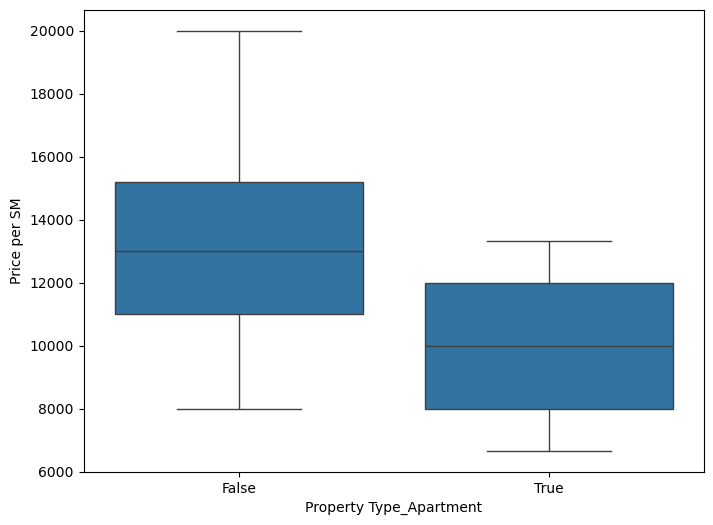

In [56]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Property Type_Apartment', y='Price per SM', data=df_analysis)
plt.show()

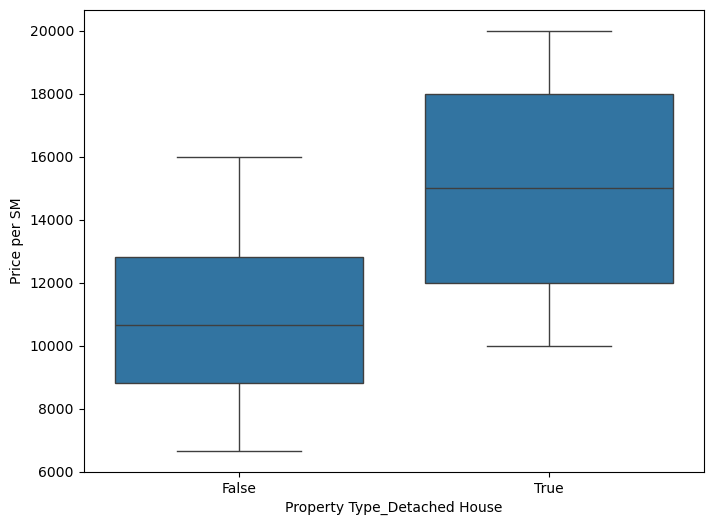

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Property Type_Detached House', y='Price per SM', data=df_analysis)
plt.show()

In [58]:
# Neighborhoods
neighborhood_list = ['Neighborhood_Camden', 'Neighborhood_Chelsea', 'Neighborhood_Greenwich', 'Neighborhood_Islington', 'Neighborhood_Kensington', 'Neighborhood_Marylebone', 'Neighborhood_Notting Hill', 'Neighborhood_Shoreditch', 'Neighborhood_Soho', 'Neighborhood_Westminster']

In [59]:
# Target variable
target_variable = 'Price per SM'

for neighborhood in neighborhood_list:
    # Chelsea
    df_analysis_neighborhood = df_analysis[df_analysis[neighborhood] == True]
    
    # Calculate the correlation matrix.
    corr_matrix = df_analysis_neighborhood.corr()[target_variable]

    # Correlation above (positive or negative) for 0.2.
    strong_correlations_neighborhood = corr_matrix[abs(corr_matrix) >= 0.35]

    # Remove the target variable itself from the list.
    strong_correlations_neighborhood = strong_correlations_neighborhood.drop(target_variable, axis=0, errors='ignore')
    print(neighborhood)
    print(strong_correlations_neighborhood)
    print('\n')


Neighborhood_Camden
Price                           0.43
Property Type_Apartment        -0.77
Property Type_Detached House    0.91
Name: Price per SM, dtype: float64


Neighborhood_Chelsea
Property Type_Apartment        -0.75
Property Type_Detached House    0.91
Name: Price per SM, dtype: float64


Neighborhood_Greenwich
Price                           0.46
Property Type_Apartment        -0.80
Property Type_Detached House    0.92
Name: Price per SM, dtype: float64


Neighborhood_Islington
Property Type_Apartment        -0.78
Property Type_Detached House    0.92
Name: Price per SM, dtype: float64


Neighborhood_Kensington
Price                           0.40
Property Type_Apartment        -0.78
Property Type_Detached House    0.88
Name: Price per SM, dtype: float64


Neighborhood_Marylebone
Property Type_Apartment        -0.84
Property Type_Detached House    0.94
Name: Price per SM, dtype: float64


Neighborhood_Notting Hill
Property Type_Apartment        -0.80
Property Type_Detached Ho

## Dimensionality Reduction

**The variables with a correlation greater than or equal to 0.5 (except 'Price Per SM') will be selected to attempt to predict the target variable, Price per Square Meters.**

In [60]:
strong_correlations.index

Index(['Square Meters', 'Price', 'Address_Oxford Street',
       'Neighborhood_Camden', 'Neighborhood_Chelsea', 'Neighborhood_Greenwich',
       'Neighborhood_Islington', 'Neighborhood_Kensington',
       'Neighborhood_Notting Hill', 'Neighborhood_Shoreditch',
       'Neighborhood_Soho', 'Neighborhood_Westminster', 'Garage_No',
       'Garage_Yes', 'Property Type_Apartment', 'Property Type_Detached House',
       'View_City'],
      dtype='object')

We will use only 18 out of 50 columns to train the model, removing 32 columns, which will reduce the cost of training the model.

In [61]:
strong_correlations = strong_correlations.drop('Price')
columns_to_keep = list(strong_correlations.index) + ['Price per SM']
df_analysis = df_analysis[columns_to_keep]

In [62]:
df_analysis

,Square Meters,Address_Oxford Street,Neighborhood_Camden,Neighborhood_Chelsea,Neighborhood_Greenwich,Neighborhood_Islington,Neighborhood_Kensington,Neighborhood_Notting Hill,Neighborhood_Shoreditch,Neighborhood_Soho,Neighborhood_Westminster,Garage_No,Garage_Yes,Property Type_Apartment,Property Type_Detached House,View_City,Price per SM
0,179,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,12800.00
1,123,True,False,False,False,False,False,False,False,False,True,True,False,True,False,True,12000.00
2,168,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,11200.00
3,237,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,8000.00
4,127,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,12000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,14400.00
996,65,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,8666.66
997,191,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,10399.99
998,131,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,13000.00


# Models 🔮

## Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [64]:
r2_list = dict()

In [65]:
x = df_analysis.drop(columns='Price per SM')
y = df_analysis['Price per SM']

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score, test_score

(0.9831610703052068, 0.9839768247031899)

In [68]:
# train RMSE
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# test RMSE
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Saves the model's coefficient of determination
r2_list['Linear Regression'] = test_score

print(f'Train RMSE: {rmse_train:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')
print(f'R2: {r2_list['Linear Regression']:.2f}')

Train RMSE: 428.54
Test RMSE: 422.20
R2: 0.98


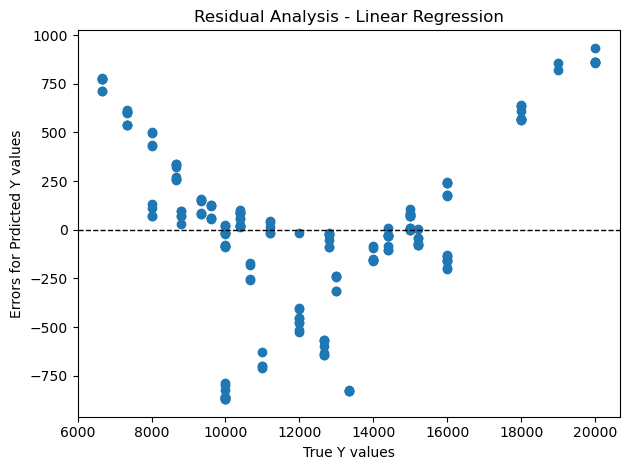

In [69]:
errors = y_test - y_test_pred

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis - Linear Regression")
plt.tight_layout()
plt.show()

R²: The coefficient of determination of 0.98 indicates that the model explains 98% of the data variability.

## Lasso Regression

In [70]:
from sklearn.linear_model import LassoCV

# Model 
model_2 = LassoCV(cv=5) # Divide the data into k-parts

# Training model
model_2.fit(X_train, y_train)

LassoCV(cv=5)

In [71]:
train_score = model_2.score(X_train, y_train)
test_score = model_2.score(X_test, y_test)

train_score, test_score

(0.9826573534228947, 0.9836538217087601)

In [72]:
r2_list['Lasso Regression'] = test_score

In [73]:
# train RMSE
y_train_pred = model_2.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# test RMSE
y_test_pred = model_2.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {rmse_train:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')
print(f'R2: {r2_list['Lasso Regression']:.2f}')

Train RMSE: 434.90
Test RMSE: 426.43
R2: 0.98


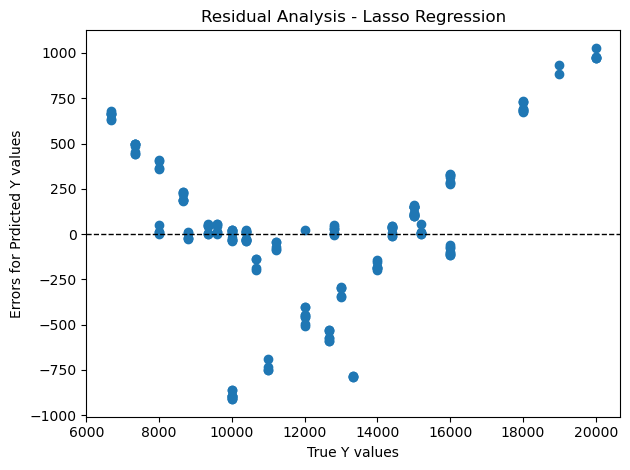

In [74]:
errors = y_test - y_test_pred

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis - Lasso Regression")
plt.tight_layout()
plt.show()

## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

model_3 = DecisionTreeRegressor(random_state=42)

model_3.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [76]:
# R² for training and testing
train_score = model_3.score(X_train, y_train)
test_score = model_3.score(X_test, y_test)

train_score, test_score

(0.9999999999999996, 0.9999999999993222)

In [77]:
model_3.feature_importances_

array([5.45944114e-13, 8.74668527e-15, 1.22538132e-02, 1.80376159e-01,
       5.67737305e-02, 2.34681772e-02, 1.90423705e-01, 4.87649290e-02,
       3.30805988e-02, 3.29165871e-03, 1.20432115e-01, 1.28629754e-14,
       2.26533973e-14, 6.35739622e-02, 2.67561151e-01, 1.58328805e-14])

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_3, x, y, cv=5, scoring='r2')
print(f"R² Médio: {scores.mean()}, Desvio Padrão: {scores.std()}")

R² Médio: 0.9999999999992537, Desvio Padrão: 2.6854198815854257e-13


The model shows a good average R², indicating that there is no significant evidence of overfitting.

In [79]:
r2_list['Decision Tree V1'] = test_score

In [80]:
# Train RMSE
y_train_pred = model_3.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Test RMSE
y_test_pred = model_3.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')
print(f'R2: {r2_list['Decision Tree V1']}')

Train RMSE: 6.729494085484351e-05
Test RMSE: 0.0027459711582009847
R2: 0.9999999999993222


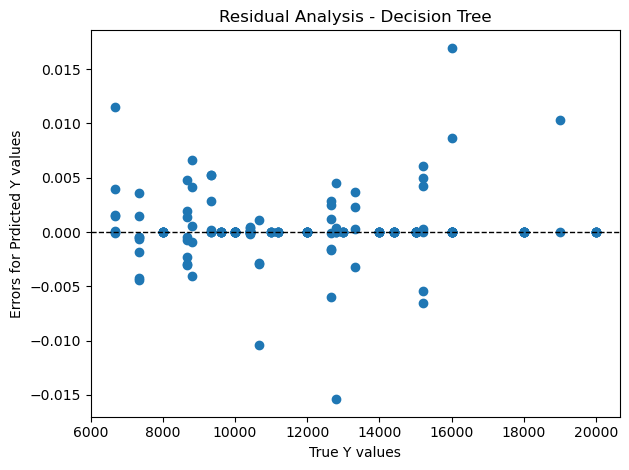

In [81]:
errors = y_test - y_test_pred

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis - Decision Tree")
plt.tight_layout()
plt.show()

In [82]:
depth_scores = dict()
for n in range(3, 21):
    model_3_2 = DecisionTreeRegressor(random_state=42, max_depth=n)
    model_3_2.fit(X_train, y_train)

    train_score = model_3_2.score(X_train, y_train)
    test_score = model_3_2.score(X_test, y_test)

    depth_scores[n] = (train_score, test_score)

depth_scores

{3: (0.6481061024740373, 0.5965559650482174),
 4: (0.7816545477902358, 0.7767338771370182),
 5: (0.8587800683250674, 0.8400899852112786),
 6: (0.9142480009963854, 0.9105997609215307),
 7: (0.9514157629283534, 0.9574529314675697),
 8: (0.9766305917311372, 0.9787860553507595),
 9: (0.9919767509850089, 0.9917498209044446),
 10: (0.998333255952308, 0.9987013327307503),
 11: (0.9999999999998808, 0.9999999999992805),
 12: (0.9999999999999223, 0.9999999999993885),
 13: (0.9999999999999574, 0.9999999999993945),
 14: (0.9999999999999702, 0.9999999999992607),
 15: (0.9999999999999765, 0.9999999999993274),
 16: (0.9999999999999883, 0.9999999999993142),
 17: (0.9999999999999922, 0.9999999999993981),
 18: (0.9999999999999983, 0.9999999999994034),
 19: (0.9999999999999991, 0.9999999999992564),
 20: (0.9999999999999996, 0.9999999999993222)}

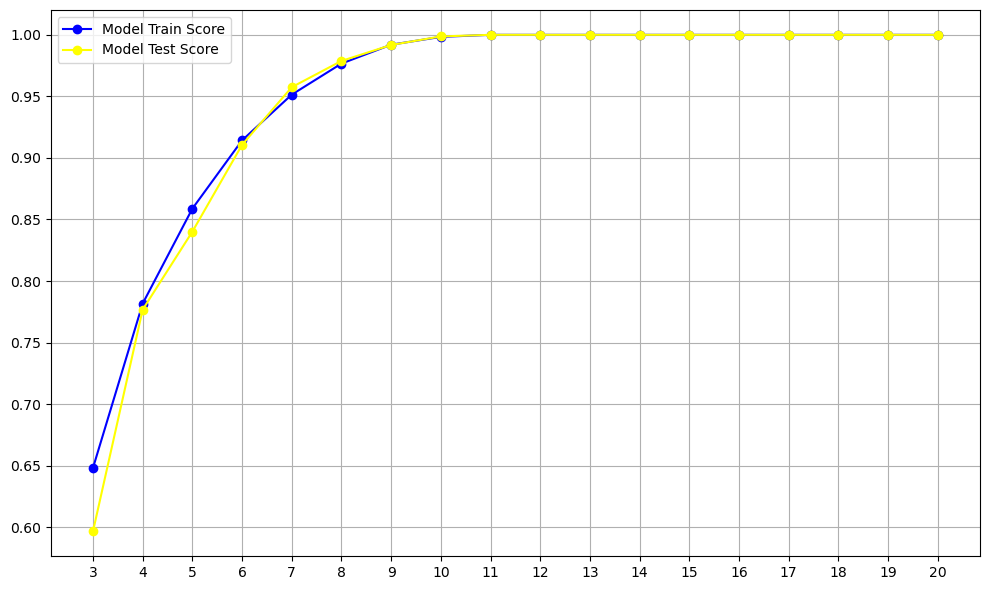

In [83]:
depths = list(depth_scores.keys())

train_score_list = [score[0] for score in depth_scores.values()]
test_score_list = [score[1] for score in depth_scores.values()]

plt.figure(figsize=(10,6))
plt.plot(depths, train_score_list, 'o-' , color='blue', label='Model Train Score')
plt.plot(depths, test_score_list, 'o-' , color='yellow', label='Model Test Score')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ideal number of epochs: 19

## Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor

model_4 = RandomForestRegressor(n_estimators=5, random_state=42, oob_score=True)
model_4.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=5, oob_score=True, random_state=42)

In [85]:
train_score = model_4.score(X_train, y_train)
test_score = model_4.score(X_test, y_test)

train_score, test_score

(0.9999999999998638, 0.9999999999996534)

In [86]:
r2_list['Random Forest'] = test_score

In [87]:
# Train RMSE
y_train_pred = model_4.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Test RMSE
y_test_pred = model_4.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')
print(f'R^2: {r2_list['Random Forest']}')

Train RMSE: 0.0012188761555604582
Test RMSE: 0.0019636732774402877
R^2: 0.9999999999996534


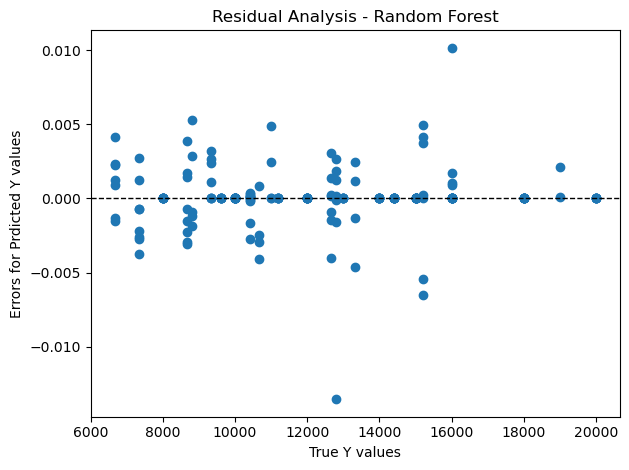

In [88]:
errors = y_test - y_test_pred

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis - Random Forest")
plt.tight_layout()
plt.show()

## AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostRegressor

In [90]:
model_5 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=5, random_state=42)
model_5.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=5,
                  random_state=42)

In [91]:
train_score = model_5.score(X_train, y_train)
test_score = model_5.score(X_test, y_test)

train_score, test_score

(0.8972064412162611, 0.890255467775519)

In [92]:
r2_list['AdaBoost'] = test_score

In [93]:
depth_scores_adaboost = dict()
for n in range(3, 21):
    model_5_2 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=n), n_estimators=5, random_state=42)
    model_5_2.fit(X_train, y_train)

    train_score = model_5_2.score(X_train, y_train)
    test_score = model_5_2.score(X_test, y_test)

    depth_scores_adaboost[n] = (train_score, test_score)

depth_scores_adaboost

{3: (0.7383010007486978, 0.749757218101767),
 4: (0.870762230044946, 0.863288165103092),
 5: (0.8972064412162611, 0.890255467775519),
 6: (0.9546465539860503, 0.9632707483451419),
 7: (0.9866474773307425, 0.9893209225636037),
 8: (0.9896618211496953, 0.9896615468936117),
 9: (0.9972701182806496, 0.9968088781016753),
 10: (0.9999264709368249, 0.999889115351295),
 11: (0.9999999999999273, 0.9999999999992392),
 12: (0.9999999999999513, 0.9999999999993776),
 13: (0.9999999999999848, 0.9999999999993952),
 14: (0.9999999999999901, 0.9999999999992444),
 15: (0.9999999999999927, 0.9999999999992578),
 16: (0.9999999999999917, 0.9999999999993652),
 17: (0.9999999999999911, 0.9999999999994083),
 18: (0.9999999999999947, 0.9999999999993633),
 19: (0.9999999999999906, 0.9999999999993461),
 20: (0.9999999999999906, 0.9999999999993461)}

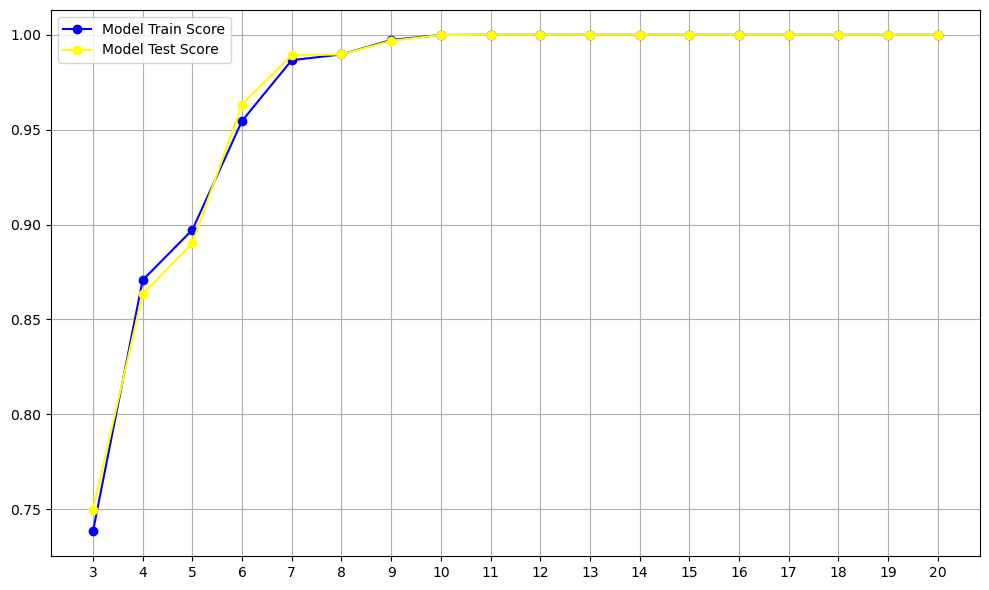

In [94]:
depths_scores_adaboost = list(depth_scores.keys())

train_score_list = [score[0] for score in depth_scores_adaboost.values()]
test_score_list = [score[1] for score in depth_scores_adaboost.values()]

plt.figure(figsize=(10,6))
plt.plot(depths, train_score_list, 'o-' , color='blue', label='Model Train Score')
plt.plot(depths, test_score_list, 'o-' , color='yellow', label='Model Test Score')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ideal number of maximum depth: 12

In [95]:
# Improved version
model_4_2 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=12), n_estimators=5, random_state=42)

model_5_2.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20), n_estimators=5,
                  random_state=42)

In [96]:
test_score = model_5_2.score(X_test, y_test)

test_score

0.9999999999993461

In [97]:
r2_list['AdaBoost V2'] = test_score

In [98]:
# Train RMSE
y_train_pred = model_5_2.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Test RMSE
y_test_pred = model_5_2.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')
print(f'R^2: {r2_list['AdaBoost V2']}')

Train RMSE: 0.000319969401423783
Test RMSE: 0.002697241570765119
R^2: 0.9999999999993461


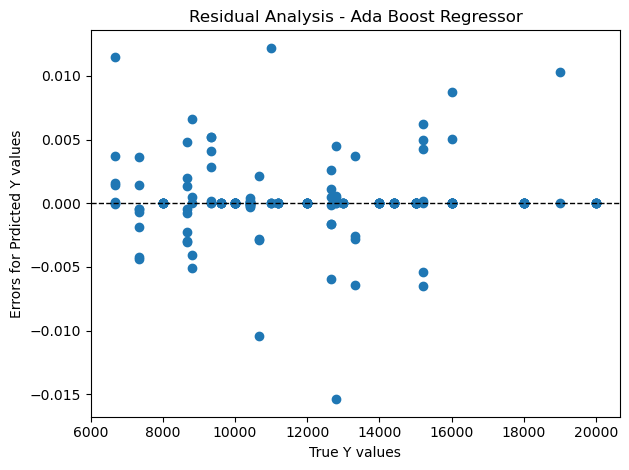

In [99]:
errors = y_test - y_test_pred

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis - Ada Boost Regressor")
plt.tight_layout()
plt.show()

## Gradient Boost

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [101]:
model_6 = GradientBoostingRegressor(n_estimators=97, learning_rate=0.1, max_depth=5, random_state=42, loss='squared_error')

model_6.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=97, random_state=42)

In [102]:
train_score = model_6.score(X_train, y_train)
test_score = model_6.score(X_test, y_test)

train_score, test_score

(0.9997538653634976, 0.9996762976620993)

In [103]:
r2_list['Gradient Boosting'] = test_score

In [104]:
# Train RMSE
y_train_pred = model_6.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Test RMSE
y_test_pred = model_6.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {rmse_train:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')
print(f'R^2: {r2_list['Gradient Boosting']}')

Train RMSE: 60.01
Test RMSE: 0.00
R^2: 0.9996762976620993


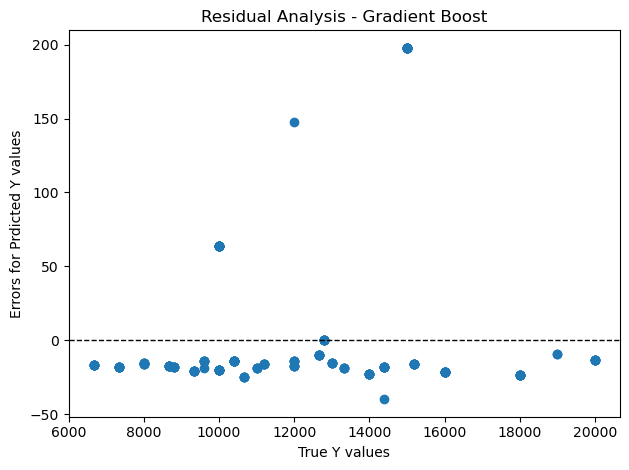

In [105]:
errors = y_test - y_test_pred

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis - Gradient Boost")
plt.tight_layout()
plt.show()

## Feedforward Neural Network (FNN)

In [106]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Leona\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: 


In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_7 = Sequential()

model_7.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_7.add(Dense(64, activation='relu'))
model_7.add(Dense(1, activation='linear'))

model_7.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\Leona\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

history = model_7.fit(X_train, y_train, validation_split=0.2, epochs=5000, callbacks=[early_stopping], batch_size=32, verbose=1)

In [116]:
from sklearn.metrics import r2_score

y_train_pred = model_7.predict(X_train)
y_test_pred = model_7.predict(X_test)

train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print(train_score)
print(test_score)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.9999476075172424
0.9999434556828634


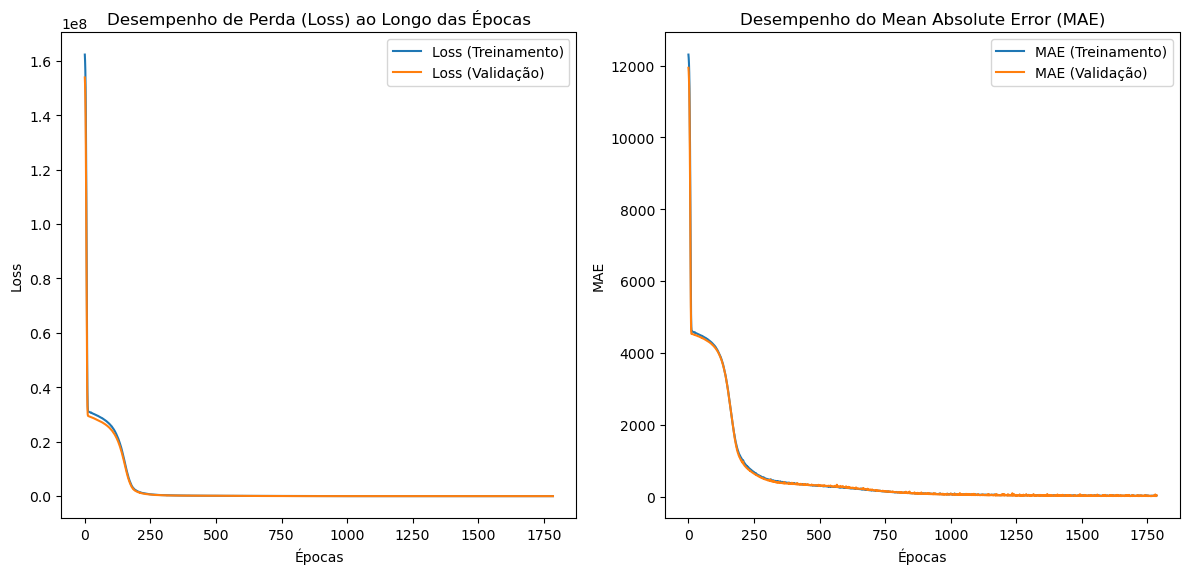

In [117]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Treinamento)')
plt.plot(history.history['val_loss'], label='Loss (Validação)')
plt.title('Desempenho de Perda (Loss) ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE (Treinamento)')
plt.plot(history.history['val_mae'], label='MAE (Validação)')
plt.title('Desempenho do Mean Absolute Error (MAE)')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

# Displaying the graphs
plt.tight_layout()
plt.show()

In [118]:
loss, mae = model_7.evaluate(X_test, y_test)
print(f'Loss (MSE): {loss}')
print(f'MAE: {mae}')

y_pred = model_7.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 537.0403 - mae: 12.0689
Loss (MSE): 629.0302124023438
MAE: 13.407100677490234
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [119]:
r2_list['FNN'] = test_score

In [122]:
y_test_pred = y_test_pred.ravel()

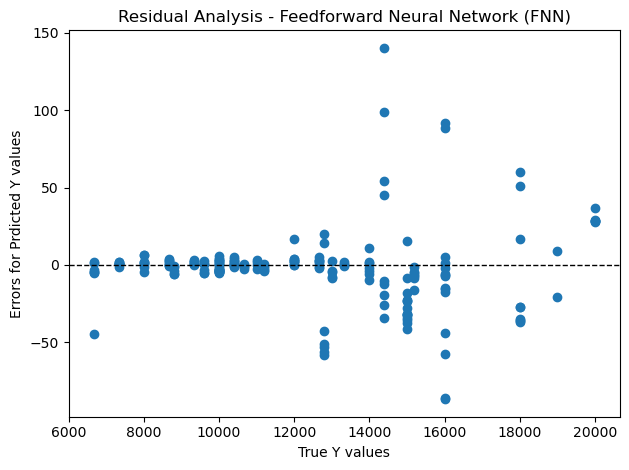

In [123]:
errors = y_test - y_test_pred

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis - Feedforward Neural Network (FNN)")
plt.tight_layout()
plt.show()

# Analyzing Model Performance 📊

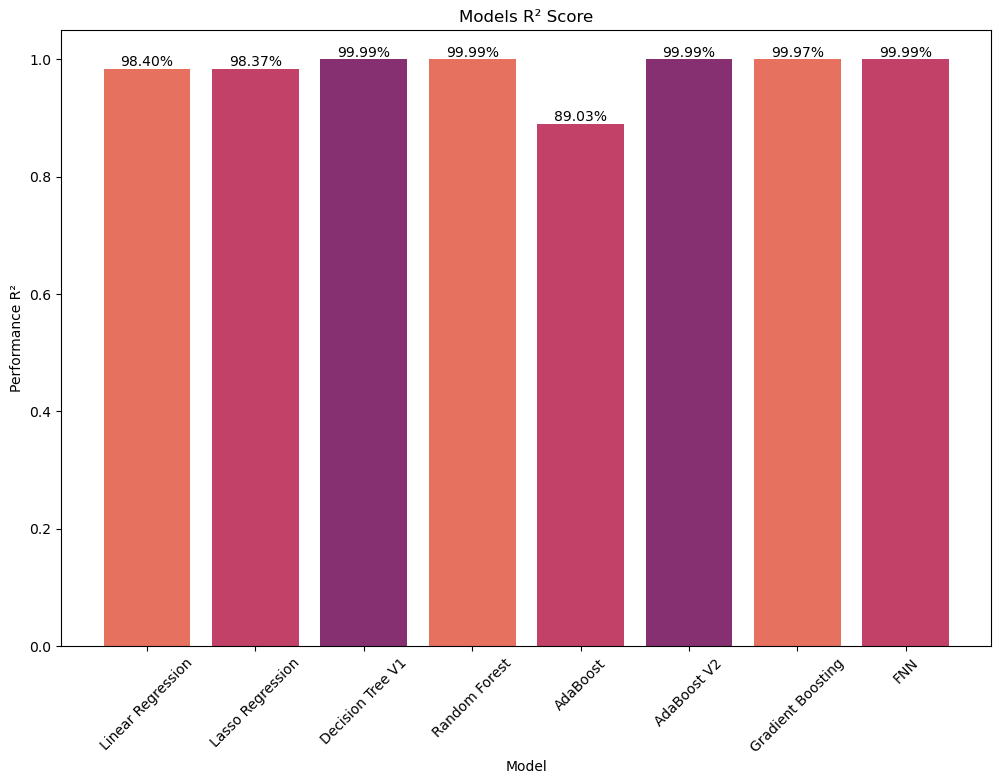

In [124]:
plt.figure(figsize=(12, 8))
bars2 = plt.bar(r2_list.keys(), r2_list.values(), color=colors)
plt.xticks(rotation=45)
plt.title('Models R² Score')
plt.xlabel('Model')
plt.ylabel('Performance R²')


for bar in bars2:
    yval = bar.get_height()
    
    # Adjustment to prevent values close to 1 (100%) from being displayed as 100%
    if yval >= 0.99999:
        yval_display = 99.99
    else:
        yval_display = yval * 100
        
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval_display:.2f}%', ha='center', va='bottom')


# Displaying the graph
plt.show()

All models exhibit a high R² score, indicating strong predictive performance for estimating price per square meter. This suggests that the models effectively capture the relationship between the input features and the target variable. This model helps estimate fair prices based on property characteristics.